Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


Read the dataset

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(730, 16)

Data quality check

In [7]:
# check for null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# percentage of null values in rows

bike.isnull().sum(axis=1)*100/len(bike)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [9]:
# checking for duplicates and dropping it if any

bike.drop_duplicates(subset = None, inplace = True)

In [10]:
bike.shape

(730, 16)

**Data cleaning**

In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# dropping unwanted columns

bike.drop(['instant'], axis=1, inplace = True)
bike.drop(['dteday'], axis=1, inplace = True)
bike.drop(['casual'], axis=1, inplace = True)
bike.drop(['registered'], axis=1, inplace = True)

In [13]:
bike.shape

(730, 12)

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


**EDA**

In [15]:
# converting the variables into category data type

bike['season'] = bike['season'].astype('category')
bike['mnth'] = bike['mnth'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


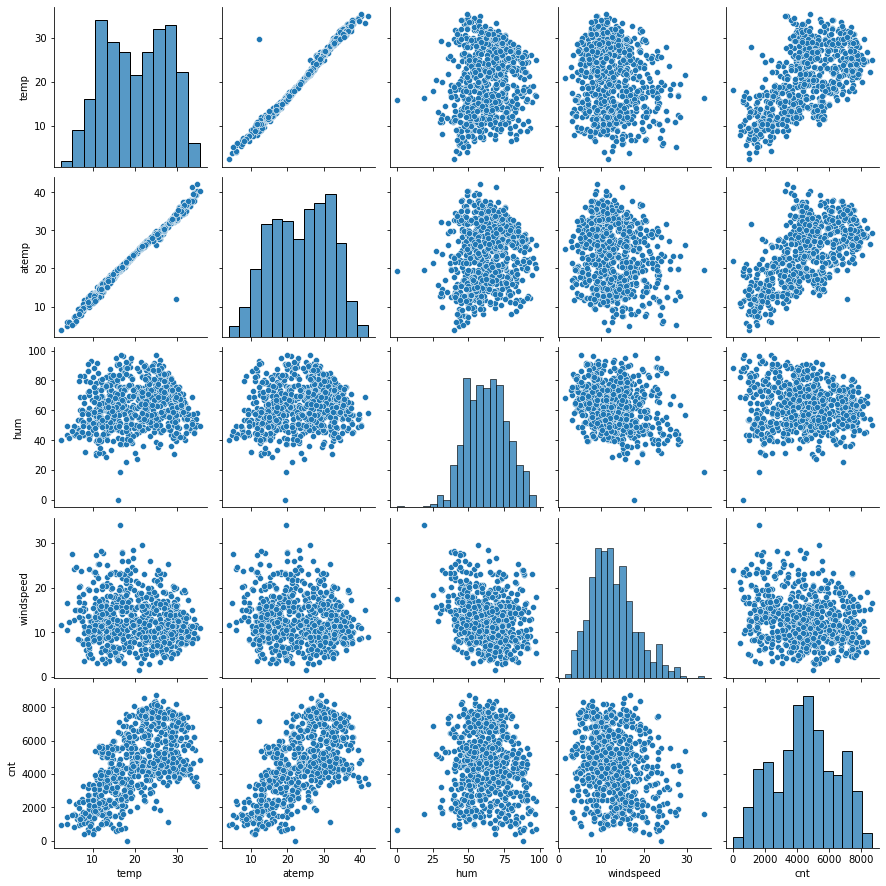

In [17]:
# pairplot of numeric variables

sns.pairplot(data = bike, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

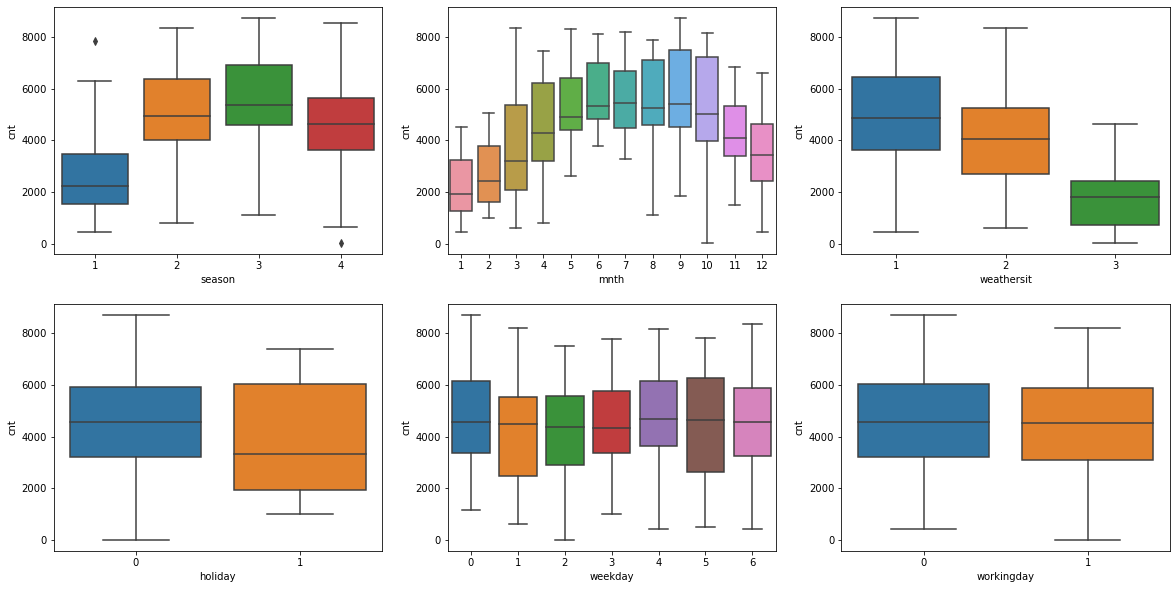

In [18]:
# categorical variables visualisation

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data= bike)
plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data= bike)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data= bike)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data= bike)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data= bike)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data= bike)
plt.show()

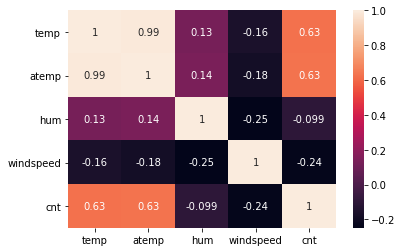

In [19]:
# heatmap of numeric variables

sns.heatmap(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True)
plt.show()

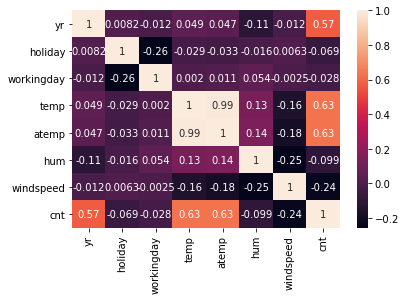

In [20]:
sns.heatmap(bike.corr(), annot=True)
plt.show()

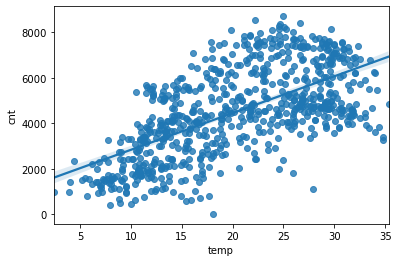

In [21]:
sns.regplot(data=bike, y='cnt', x='temp')
plt.show()

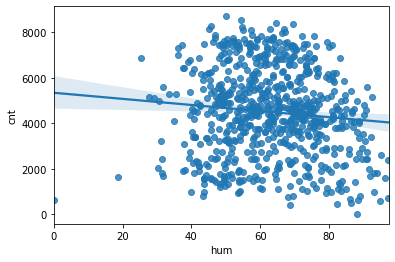

In [22]:
sns.regplot(data=bike, y='cnt', x='hum')
plt.show()

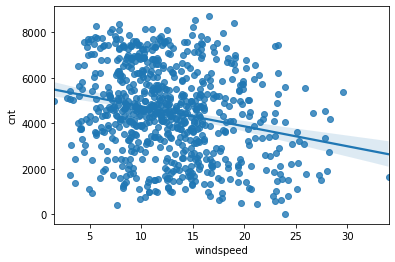

In [23]:
sns.regplot(data=bike, y='cnt', x='windspeed')
plt.show()

**creating dummy variables**
     

creating dummy variables for 4 categorical variables 'mnth', 'weekday', 'season', 'weathersit'

In [24]:
bike = pd.get_dummies(bike, drop_first = True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [25]:
bike.shape

(730, 30)

**splitting the data**

splitting the data into train and test(70:30)

In [26]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=333)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 650 to 419
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null   

In [30]:
df_test.shape

(220, 30)

**Rescaling the feature**

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0
502,1,0,0,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
numerical_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

In [36]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,0.515530,0.647696,0.346806,0.514508,0.245098,0.262745,...,0.086275,0.076471,0.141176,0.152941,0.131373,0.139216,0.147059,0.143137,0.343137,0.025490
std,0.500487,0.151726,0.462867,0.227939,0.213652,0.149805,0.160182,0.224150,0.430568,0.440557,...,0.281045,0.266010,0.348545,0.360284,0.338139,0.346511,0.354512,0.350557,0.475223,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Building a linear model**

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,15)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [42]:
column = X_train.columns[rfe.support_]
column

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [44]:
X_train_rfe = X_train[column]

**Model-1**

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,385.75
2,atemp,363.51
3,hum,16.16
6,season_3,7.09
4,windspeed,4.53
5,season_2,3.51
7,season_4,3.00
13,weathersit_2,2.16
0,yr,2.02
10,mnth_10,1.67


In [47]:
X_train_lr1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lr1).fit()

In [48]:
lr1.params

const           0.237765
yr              0.228508
temp            0.395529
atemp           0.087777
hum            -0.171131
windspeed      -0.179302
season_2        0.132076
season_3        0.085365
season_4        0.152741
mnth_3          0.047311
mnth_9          0.100483
mnth_10         0.055559
weekday_1      -0.024875
weekday_2      -0.036700
weathersit_2   -0.047571
weathersit_3   -0.272279
dtype: float64

In [49]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.61e-185
Time:                        08:41:13   Log-Likelihood:                 506.93
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     494   BIC:                            -914.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2378      0.028      8.430      0.000       0.182       0.293
yr               0.2285      0.008     27.840      0.000       0.212       0.245
temp             0.3955      0.135      2.932      0.004       0.131       0.661
atemp            0.0878      0.138      0.636      0.525      -0.183       0.359
hum             -0.1711      0.038     -4.548      0.000      -0.245      -0.097
windspeed       -0.1793      0.028     -6.373      0.000      -0.235      -0.124
season_2         0.1321      0.015      8.658      0.000       0.102       0.162
season_3         0.0854      0.021      4.076      0.000       0.044       0.127
season_4         0.1527      0.014     10.698      0.000       0.125       0.181
mnth_3           0.0473      0.016      2.957      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.305      0.000       0.069       0.132
mnth_10          0.0556      0.018      3.097      0.002       0.020       0.091
weekday_1       -0.0249      0.012     -2.096      0.037      -0.048      -0.002
weekday_2       -0.0367      0.011     -3.214      0.001      -0.059      -0.014
weathersit_2    -0.0476      0.011     -4.445      0.000      -0.069      -0.027
weathersit_3    -0.2723      0.029     -9.533      0.000      -0.328      -0.216
==============================================================================
Omnibus:                       92.593   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.414
Skew:                          -0.928   Prob(JB):                     1.86e-49
Kurtosis:                       5.667   Cond. No.                         79.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model-2**

In [50]:
# dropping 'atemp' based on it's high p-value

X_train_new = X_train_rfe.drop(['atemp'], axis=1)

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.17
2,hum,15.87
5,season_3,6.99
3,windspeed,4.37
4,season_2,3.50
6,season_4,2.99
12,weathersit_2,2.15
0,yr,2.02
9,mnth_10,1.67
8,mnth_9,1.28


In [52]:
X_train_lr2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lr2).fit()

In [53]:
lr2.params

const           0.239029
yr              0.228492
temp            0.478576
hum            -0.170359
windspeed      -0.182720
season_2        0.132212
season_3        0.083890
season_4        0.153086
mnth_3          0.047521
mnth_9          0.100512
mnth_10         0.055664
weekday_1      -0.024529
weekday_2      -0.036414
weathersit_2   -0.047762
weathersit_3   -0.272766
dtype: float64

In [54]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.42e-186
Time:                        08:41:13   Log-Likelihood:                 506.72
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     495   BIC:                            -919.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.028      8.501      0.000       0.184       0.294
yr               0.2285      0.008     27.855      0.000       0.212       0.245
temp             0.4786      0.034     14.172      0.000       0.412       0.545
hum             -0.1704      0.038     -4.532      0.000      -0.244      -0.097
windspeed       -0.1827      0.028     -6.620      0.000      -0.237      -0.128
season_2         0.1322      0.015      8.673      0.000       0.102       0.162
season_3         0.0839      0.021      4.032      0.000       0.043       0.125
season_4         0.1531      0.014     10.736      0.000       0.125       0.181
mnth_3           0.0475      0.016      2.973      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.311      0.000       0.069       0.132
mnth_10          0.0557      0.018      3.104      0.002       0.020       0.091
weekday_1       -0.0245      0.012     -2.070      0.039      -0.048      -0.001
weekday_2       -0.0364      0.011     -3.194      0.001      -0.059      -0.014
weathersit_2    -0.0478      0.011     -4.467      0.000      -0.069      -0.027
weathersit_3    -0.2728      0.029     -9.559      0.000      -0.329      -0.217
==============================================================================
Omnibus:                       91.721   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.833
Skew:                          -0.921   Prob(JB):                     6.75e-49
Kurtosis:                       5.655   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model-3**

In [55]:
# dropping 'hum' due to it's high vif(not dropping temp since it has the highest vif because it is an important factor for this business)

X_train_new = X_train_new.drop(["hum"], axis=1)

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.16
4,season_3,6.65
2,windspeed,3.91
3,season_2,3.47
5,season_4,2.88
0,yr,2.02
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


In [57]:
X_train_lr3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lr3).fit()

In [58]:
lr3.params

const           0.141331
yr              0.232622
temp            0.446326
windspeed      -0.145907
season_2        0.134094
season_3        0.093402
season_4        0.149986
mnth_3          0.055165
mnth_9          0.092182
mnth_10         0.054565
weekday_1      -0.028528
weekday_2      -0.039637
weathersit_2   -0.076114
weathersit_3   -0.323376
dtype: float64

In [59]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.26e-183
Time:                        08:41:13   Log-Likelihood:                 496.35
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     496   BIC:                            -905.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1413      0.018      7.678      0.000       0.105       0.177
yr               0.2326      0.008     27.989      0.000       0.216       0.249
temp             0.4463      0.034     13.261      0.000       0.380       0.512
windspeed       -0.1459      0.027     -5.426      0.000      -0.199      -0.093
season_2         0.1341      0.016      8.631      0.000       0.104       0.165
season_3         0.0934      0.021      4.426      0.000       0.052       0.135
season_4         0.1500      0.015     10.329      0.000       0.121       0.179
mnth_3           0.0552      0.016      3.404      0.001       0.023       0.087
mnth_9           0.0922      0.016      5.715      0.000       0.060       0.124
mnth_10          0.0546      0.018      2.985      0.003       0.019       0.090
weekday_1       -0.0285      0.012     -2.368      0.018      -0.052      -0.005
weekday_2       -0.0396      0.012     -3.417      0.001      -0.062      -0.017
weathersit_2    -0.0761      0.009     -8.610      0.000      -0.093      -0.059
weathersit_3    -0.3234      0.027    -12.080      0.000      -0.376      -0.271
==============================================================================
Omnibus:                       86.393   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.907
Skew:                          -0.882   Prob(JB):                     1.43e-44
Kurtosis:                       5.527   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model-4**

In [60]:
# dropping 'season_3' due to it's high vif(not dropping temp since it has the highest vif because it is an important factor for this business)

X_train_new = X_train_new.drop(['season_3'], axis=1)

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.73
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [62]:
X_train_lr4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lr4).fit()

In [63]:
lr4.params

const           0.124723
yr              0.230595
temp            0.565197
windspeed      -0.150663
season_2        0.082932
season_4        0.117698
mnth_3          0.043570
mnth_9          0.104501
mnth_10         0.042591
weekday_1      -0.025589
weekday_2      -0.037919
weathersit_2   -0.076465
weathersit_3   -0.315286
dtype: float64

In [64]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.24e-180
Time:                        08:41:14   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1247      0.018      6.796      0.000       0.089       0.161
yr               0.2306      0.008     27.282      0.000       0.214       0.247
temp             0.5652      0.021     27.356      0.000       0.525       0.606
windspeed       -0.1507      0.027     -5.505      0.000      -0.204      -0.097
season_2         0.0829      0.011      7.844      0.000       0.062       0.104
season_4         0.1177      0.013      9.204      0.000       0.093       0.143
mnth_3           0.0436      0.016      2.675      0.008       0.012       0.076
mnth_9           0.1045      0.016      6.458      0.000       0.073       0.136
mnth_10          0.0426      0.018      2.313      0.021       0.006       0.079
weekday_1       -0.0256      0.012     -2.089      0.037      -0.050      -0.002
weekday_2       -0.0379      0.012     -3.211      0.001      -0.061      -0.015
weathersit_2    -0.0765      0.009     -8.493      0.000      -0.094      -0.059
weathersit_3    -0.3153      0.027    -11.590      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       66.467   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.546
Skew:                          -0.759   Prob(JB):                     2.01e-28
Kurtosis:                       4.923   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assumptions**

**error terms are normally distributes with mean zero**

**Residual analysis for training data**

In [65]:
y_train_pred = lr4.predict(X_train_lr4)

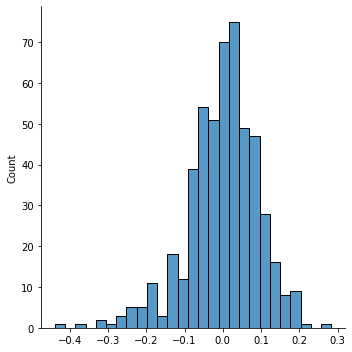

In [66]:
res = y_train-y_train_pred
sns.displot((res))
plt.show()

**there is a linear relationship between X and y**

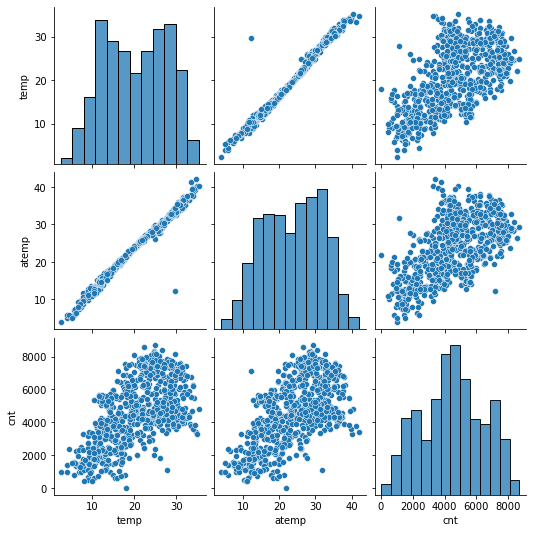

In [67]:
sns.pairplot(data = bike, vars = ['temp', 'atemp', 'cnt'])
plt.show()

**there is no multicollinearity between the predictor variables**

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.73
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [69]:
numerical_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[numerical_var] = scaler.transform(df_test[numerical_var])

In [70]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [71]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.072727,0.104545,0.150000,0.122727,0.168182,0.150000,0.131818,0.140909,0.322727,0.036364
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.260281,0.306665,0.357886,0.328872,0.374881,0.357886,0.339064,0.348721,0.468586,0.187620
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null   

In [73]:
column1 = X_train_new.columns
X_test = X_test[column1]
X_test_lr4 = sm.add_constant(X_test)
X_test_lr4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   temp          220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   mnth_3        220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   mnth_10       220 non-null    uint8  
 9   weekday_1     220 non-null    uint8  
 10  weekday_2     220 non-null    uint8  
 11  weathersit_2  220 non-null    uint8  
 12  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(9)
memory usage: 10.5 KB


In [74]:
y_pred = lr4.predict(X_test_lr4)

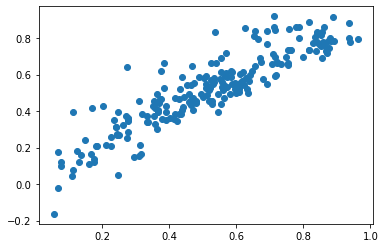

In [75]:
plt.scatter(y_test, y_pred)
plt.show()

**R^2 value for test**

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8075956555145728

**adjusted R^2 value**

In [77]:
X_test.shape

(220, 12)

In [78]:
n = X_test.shape[0]
p = X_test.shape[1]
r2 = 0.8075956555145728
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7964417804719394

- Train R^2 0.827
- Train adjusted R^2 0.823
- Test R^2 0.807
- Test adjusted R^2 0.796